# Assignment 1: Advanced Python AI and ML Tools
    


# Submitted by:
Abishek Murukesha Pillai Ramesh(C0859051),
Ansu Rachel Raju(C0861114), 
Krishna Babu Menon(C0856683), 
Neethu Narayanan (C0858319)

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd
import pandas_profiling
import re
import numpy as np
import seaborn as sns
import sklearn.preprocessing as preprocessing
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px
import plotly.graph_objs as go
import plotly as py
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

## Getting the webdriver and navigating to the site: https://property.ca/canada/houses-for-sale

In [7]:
driver = webdriver.Chrome()
driver.maximize_window()

In [9]:
url="https://property.ca/canada/houses-for-sale"

In [10]:
driver.get(url)
time.sleep(5)

In [11]:
WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "#root > div > header > nav > div > div:nth-child(2) > div > nav > ul > li.styles___LogInOutContainer-sc-8m46ac-12.ljqaS > div > div > button:nth-child(1)"))).click()

## Login to the site to retrieve more data using the generic gmail and password created for team

In [12]:
username=driver.find_element(By.ID, 'email')
password=driver.find_element(By.ID, 'password')
username.send_keys("groupelite4321@gmail.com");
password.send_keys("Elite@1234");
WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "body > div.styles___Modal-sc-1l4jmki-2.styles___LoginModal-sc-1l4jmki-8.feBqAy.eQttSS.login > div > div > div.styles___LoginModal-sc-d3p3gj-0.letQMI > div > div > div > button"))).click()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[id="email"]"}
  (Session info: chrome=107.0.5304.107)
Stacktrace:
Backtrace:
	Ordinal0 [0x00EB1ED3+2236115]
	Ordinal0 [0x00E492F1+1807089]
	Ordinal0 [0x00D566FD+812797]
	Ordinal0 [0x00D855DF+1005023]
	Ordinal0 [0x00D857CB+1005515]
	Ordinal0 [0x00DB7632+1209906]
	Ordinal0 [0x00DA1AD4+1120980]
	Ordinal0 [0x00DB59E2+1202658]
	Ordinal0 [0x00DA18A6+1120422]
	Ordinal0 [0x00D7A73D+960317]
	Ordinal0 [0x00D7B71F+964383]
	GetHandleVerifier [0x0115E7E2+2743074]
	GetHandleVerifier [0x011508D4+2685972]
	GetHandleVerifier [0x00F42BAA+532202]
	GetHandleVerifier [0x00F41990+527568]
	Ordinal0 [0x00E5080C+1837068]
	Ordinal0 [0x00E54CD8+1854680]
	Ordinal0 [0x00E54DC5+1854917]
	Ordinal0 [0x00E5ED64+1895780]
	BaseThreadInitThunk [0x76327BA9+25]
	RtlInitializeExceptionChain [0x7777BB9B+107]
	RtlClearBits [0x7777BB1F+191]


# Navigating only through the property type Condominium for the GTA region in order to avoid redundant data

In [ ]:
WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "#root > div > header > nav > div > div:nth-child(2) > div > nav > ul > li:nth-child(3) > div > div > button"))).click()
WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, "//*[@id='0']"))).click()
WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, "//*[@id='root']/div/header/nav/div/div[2]/div/nav/ul/li[3]/div/ul/li[1]/ul/li[2]/a"))).click()
WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "#heap-Search-Sale > div > div > div.styles___ContentView-sc-ij90fh-3.lfBrFF.contentView > div > div:nth-child(3) > div.styles___Flex-sc-1lfxfux-0.ctQIUd.styles___FilterBarContainer-sc-cxo39o-2.hMIiiL > div.styles___Flex-sc-1lfxfux-0.kavCvy.styles___MoreFilterAlertContainer-sc-cxo39o-1.kIvzFN > button.styles___AppButton-sc-5pk18n-0.fcbOdi.styles___MoreFilterBtn-sc-cxo39o-4.bcaxPk"))).click()
WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "#heap-Search-Sale > div > div > div.styles___ContentView-sc-ij90fh-3.lfBrFF.contentView > div > div:nth-child(3) > div:nth-child(2) > div > div.styles___FilterView-sc-m2vy6q-0.edcwBR > div:nth-child(6) > section > div.styles___ChildrenContainer-sc-1jzam25-2.wgfcv > div > div:nth-child(3) > button"))).click()
WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "#heap-Search-Sale > div > div > div.styles___ContentView-sc-ij90fh-3.lfBrFF.contentView > div > div:nth-child(3) > div:nth-child(2) > div > div.styles___ListingCountFloatingBar-sc-1fw9kca-0.LbUKR > div:nth-child(2) > button"))).click()


## Navigating through the sites and getting the records from the site

In [13]:
j= 2
properties =[]
while j < 112:
    housedetails = driver.find_elements(By.XPATH, "//*[@id='listRow']/div")
    for i in range(1,len(housedetails)):
        house = {}
        try:
    #if housedetails[i].find_elements_by_xpath(f'//*[@id="listRow"]/div[{i}]/div/a'):
            price= housedetails[i].find_element(By.XPATH,f'//*[@id="listRow"]/div[{i}]/div[1]/a/div[2]/div[1]/div[1]').text
            address=housedetails[i].find_element(By.XPATH,f'//*[@id="listRow"]/div[{i}]/div[1]/a/div[2]/div[2]/div/address').text
            specifics=housedetails[i].find_element(By.XPATH,f'//*[@id="listRow"]/div[{i}]/div[1]/a/div[2]/div[3]').text
            house['Price'] = price
            house['Address'] = address
            house['Specifics'] = specifics
            properties.append(house)
            
        except NoSuchElementException:
            print(i)
    #driver.find_element(By.XPATH,f'//*[@id="heap-Search-Sale"]/div[1]/div/div[1]/div/div[3]/div/div[3]/div/div/div[1]/div/div[2]/ul/li[{j+1}]/a').click()
    #WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, f'//*[@id="heap-Search-Sale"]/div[1]/div/div[1]/div/div[3]/div/div[3]/div/div/div[1]/div/div[2]/ul/li[{j+1}]/a')).click();
    #WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, f'//*[@id="heap-Search-Sale"]/div[1]/div/div[1]/div/div[3]/div/div[3]/div/div/div[1]/div/div[2]/ul/li[{j+1}]/a'))).click()
    newUrl = f"https://property.ca/gta/houses-for-sale?home_type=Condo&page={j}";
    driver.get(newUrl)
    time.sleep(5)
    j+=1


32
44
21
27
34
45
5
13
17
18
19
20
21
22
23
24
25
27
31
41
45
25
5
8
18
47
1
2
3
6
42
7
8
21
29
31
35
14
15
16
33
12
31
43
5
15
16
27
35
9


KeyboardInterrupt: 

In [14]:
len(properties)

478

In [15]:
properties

[{'Price': '$769,000',
  'Address': '2020 Maple Blvd',
  'Specifics': '3+1BD1BA6 Parking700-1,100 sqft'},
 {'Price': '$289,900',
  'Address': '122 Stevens Crt',
  'Specifics': '2BD2BA2 Parking'},
 {'Price': '$835,000',
  'Address': '35 Cheltonwood Ave',
  'Specifics': '3+1BD2BA3 Parking700-1,100 sqft'},
 {'Price': '$649,900',
  'Address': '276 Herbert St',
  'Specifics': '3BD1BA3 Parking700-1,100 sqft'},
 {'Price': '$739,900',
  'Address': '21 Trafalger St',
  'Specifics': '3BD2BA6 Parking1,100-1,500 sqft'},
 {'Price': '$649,900',
  'Address': '76 - 541 Winston Rd',
  'Specifics': '2BD2BA2 Parking1,100-1,500 sqft'},
 {'Price': '$659,900',
  'Address': '257 Mackenzie Cres',
  'Specifics': '3BD2BA2 Parking1,100-1,500 sqft'},
 {'Price': '$729,900',
  'Address': '805 Stonewalk Dr',
  'Specifics': '3BD3BA2 Parking'},
 {'Price': '$1,099,000',
  'Address': '5442 Tenth Line',
  'Specifics': '5BD3BA8 Parking3,000-3,500 sqft'},
 {'Price': '$1,099,999',
  'Address': '1386 Lakeshore Rd',
  'Specif

## Converting the dictionaries into dataframe

In [16]:
df_properties=pd.DataFrame(properties)

In [17]:
df_properties.head(50)

,Price,Address,Specifics
0,"$769,000",2020 Maple Blvd,"3+1BD1BA6 Parking700-1,100 sqft"
1,"$289,900",122 Stevens Crt,2BD2BA2 Parking
2,"$835,000",35 Cheltonwood Ave,"3+1BD2BA3 Parking700-1,100 sqft"
3,"$649,900",276 Herbert St,"3BD1BA3 Parking700-1,100 sqft"
4,"$739,900",21 Trafalger St,"3BD2BA6 Parking1,100-1,500 sqft"
5,"$649,900",76 - 541 Winston Rd,"2BD2BA2 Parking1,100-1,500 sqft"
6,"$659,900",257 Mackenzie Cres,"3BD2BA2 Parking1,100-1,500 sqft"
7,"$729,900",805 Stonewalk Dr,3BD3BA2 Parking
8,"$1,099,000",5442 Tenth Line,"5BD3BA8 Parking3,000-3,500 sqft"
9,"$1,099,999",1386 Lakeshore Rd,"4BD3BA12 Parking2,500-3,000 sqft"


## Saved the records to the csv file

In [19]:
df_properties.to_csv('Properties_Condos.csv')

In [20]:
df_prop=pd.read_csv('Properties_Condos.csv')

In [21]:
df_prop=pd.DataFrame(df_prop)

In [22]:
df_prop.head()

,Unnamed: 0,Price,Address,Specifics
0,0,"$769,000",2020 Maple Blvd,"3+1BD1BA6 Parking700-1,100 sqft"
1,1,"$289,900",122 Stevens Crt,2BD2BA2 Parking
2,2,"$835,000",35 Cheltonwood Ave,"3+1BD2BA3 Parking700-1,100 sqft"
3,3,"$649,900",276 Herbert St,"3BD1BA3 Parking700-1,100 sqft"
4,4,"$739,900",21 Trafalger St,"3BD2BA6 Parking1,100-1,500 sqft"


# EDA

In [23]:
df_prop.dtypes

Unnamed: 0     int64
Price         object
Address       object
Specifics     object
dtype: object

In [24]:
df_prop.describe()

,Unnamed: 0
count,478.000000
mean,238.500000
std,138.130976
min,0.000000
25%,119.250000
50%,238.500000
75%,357.750000
max,477.000000


In [26]:
df_prop['Specifications']=df_prop['Specifics']

## Converting the word Studio with 1BD -- ie 1 bedroom

In [27]:
#df_prop['Dummy']=[str(x).replace("Studio","1BD") for x in df['Specifics']]
df_prop['Specifications']=df_prop['Specifications'].str.replace("Studio","1BD", regex=True)

In [28]:
df_prop.iloc[312:]

,Unnamed: 0,Price,Address,Specifics,Specifications
312,312,"$629,999",1407 - 21 Overlea Blvd,2BD2BA1 Parking900-999 sqft,2BD2BA1 Parking900-999 sqft
313,313,"$2,250,000",PH3705 - 59 Annie Craig Drive Dr,"2+1BD3BA2 Parking1,600-1,799 sqft","2+1BD3BA2 Parking1,600-1,799 sqft"
314,314,"$449,000",2512 - 385 Prince Of Wales Dr,Studio1BA2 Parking0-499 sqft,1BD1BA2 Parking0-499 sqft
315,315,"$799,900",410 - 70 Annie Craig Dr,2BD2BA1 Parking800-899 sqft,2BD2BA1 Parking800-899 sqft
316,316,"$679,000",517 - 7 Smith Cres,2BD1BA1 Parking700-799 sqft,2BD1BA1 Parking700-799 sqft
...,...,...,...,...,...
473,473,"$369,900",601 - 2800 Warden Ave,1+1BD1BA1 Parking700-799 sqft,1+1BD1BA1 Parking700-799 sqft
474,474,"$549,000",804 - 2800 Warden Ave,"2+1BD2BA1 Parking1,000-1,199 sqft","2+1BD2BA1 Parking1,000-1,199 sqft"
475,475,"$659,900",318 - 10211 Keele St,2BD2BA1 Parking800-899 sqft,2BD2BA1 Parking800-899 sqft
476,476,"$895,000",307 - 3028 Creekshore Common,"2BD2BA2 Parking1,000-1,199 sqft","2BD2BA2 Parking1,000-1,199 sqft"


## Splitting the specification column in order to get the number of bedroom, bathrooms, parking and square feet

In [29]:
#df_prop['Bedrooms']=df_prop['Specifics'].str.split('BD',expand=True)[0]
df_prop['specs']=df_prop['Specifications'].apply(lambda x: re.sub(r'[^0-9+, ]+',' ',str(x)))
        

In [30]:
dataframe = df_prop['specs'].str.split(' ', expand=True)

In [31]:
dataframe.head(3)

,0,1,2,3,4,5,6,7
0,3+1,1,6,,700,"1,100",,
1,2,2,2,,,None,None,None
2,3+1,2,3,,700,"1,100",,


In [32]:
dataframe.iloc[14002:]

,0,1,2,3,4,5,6,7


In [33]:
dataframe.iloc[312:]

,0,1,2,3,4,5,6,7
312,2,2,1,,900,999,,
313,2+1,3,2,,"1,600","1,799",,
314,1,1,2,,0,499,,
315,2,2,1,,800,899,,
316,2,1,1,,700,799,,
...,...,...,...,...,...,...,...,...
473,1+1,1,1,,700,799,,
474,2+1,2,1,,"1,000","1,199",,
475,2,2,1,,800,899,,
476,2,2,2,,"1,000","1,199",,


# Considering the max sqft for the property

In [34]:
for i in range(0,len(dataframe)):
    if (dataframe.iloc[i,5]=='' or dataframe.iloc[i,5]==0) :
        dataframe.iloc[i,5]=dataframe.iloc[i,4]

In [35]:
dataframe.head(3)

,0,1,2,3,4,5,6,7
0,3+1,1,6,,700,"1,100",,
1,2,2,2,,,None,None,None
2,3+1,2,3,,700,"1,100",,


In [36]:
dataframe.iloc[14002:]

,0,1,2,3,4,5,6,7


In [37]:
dataframe.iloc[312:]

,0,1,2,3,4,5,6,7
312,2,2,1,,900,999,,
313,2+1,3,2,,"1,600","1,799",,
314,1,1,2,,0,499,,
315,2,2,1,,800,899,,
316,2,1,1,,700,799,,
...,...,...,...,...,...,...,...,...
473,1+1,1,1,,700,799,,
474,2+1,2,1,,"1,000","1,199",,
475,2,2,1,,800,899,,
476,2,2,2,,"1,000","1,199",,


In [38]:
dataframe[0]

0      3+1
1        2
2      3+1
3        3
4        3
      ... 
473    1+1
474    2+1
475      2
476      2
477      1
Name: 0, Length: 478, dtype: object

In [39]:
#for i in range(0,len(dataframe)):
 #   if '+' in dataframe.iloc[i,0]:
data=pd.Series(dataframe[0])
Bed=data.str.split('+',expand=True)
dataframe[0]=Bed[0]
dataframe.head()

,0,1,2,3,4,5,6,7
0,3,1,6,,700,"1,100",,
1,2,2,2,,,None,None,None
2,3,2,3,,700,"1,100",,
3,3,1,3,,700,"1,100",,
4,3,2,6,,"1,100","1,500",,


In [40]:
dataframe.columns=['Bed','Bath','Parking','Dummy','Min','Sqft',"Dummy1",'Dummy2']

In [41]:
dataframe=dataframe.drop(columns=['Dummy','Min','Dummy1','Dummy2'])

In [42]:
dataframe

,Bed,Bath,Parking,Sqft
0,3,1,6,"1,100"
1,2,2,2,None
2,3,2,3,"1,100"
3,3,1,3,"1,100"
4,3,2,6,"1,500"
...,...,...,...,...
473,1,1,1,799
474,2,2,1,"1,199"
475,2,2,1,899
476,2,2,2,"1,199"


In [43]:
house_df=pd.concat([df_prop, dataframe], axis=1, join='outer')

In [44]:
house_df

,Unnamed: 0,Price,Address,Specifics,Specifications,specs,Bed,Bath,Parking,Sqft
0,0,"$769,000",2020 Maple Blvd,"3+1BD1BA6 Parking700-1,100 sqft","3+1BD1BA6 Parking700-1,100 sqft","3+1 1 6 700 1,100",3,1,6,"1,100"
1,1,"$289,900",122 Stevens Crt,2BD2BA2 Parking,2BD2BA2 Parking,2 2 2,2,2,2,None
2,2,"$835,000",35 Cheltonwood Ave,"3+1BD2BA3 Parking700-1,100 sqft","3+1BD2BA3 Parking700-1,100 sqft","3+1 2 3 700 1,100",3,2,3,"1,100"
3,3,"$649,900",276 Herbert St,"3BD1BA3 Parking700-1,100 sqft","3BD1BA3 Parking700-1,100 sqft","3 1 3 700 1,100",3,1,3,"1,100"
4,4,"$739,900",21 Trafalger St,"3BD2BA6 Parking1,100-1,500 sqft","3BD2BA6 Parking1,100-1,500 sqft","3 2 6 1,100 1,500",3,2,6,"1,500"
...,...,...,...,...,...,...,...,...,...,...
473,473,"$369,900",601 - 2800 Warden Ave,1+1BD1BA1 Parking700-799 sqft,1+1BD1BA1 Parking700-799 sqft,1+1 1 1 700 799,1,1,1,799
474,474,"$549,000",804 - 2800 Warden Ave,"2+1BD2BA1 Parking1,000-1,199 sqft","2+1BD2BA1 Parking1,000-1,199 sqft","2+1 2 1 1,000 1,199",2,2,1,"1,199"
475,475,"$659,900",318 - 10211 Keele St,2BD2BA1 Parking800-899 sqft,2BD2BA1 Parking800-899 sqft,2 2 1 800 899,2,2,1,899
476,476,"$895,000",307 - 3028 Creekshore Common,"2BD2BA2 Parking1,000-1,199 sqft","2BD2BA2 Parking1,000-1,199 sqft","2 2 2 1,000 1,199",2,2,2,"1,199"


In [45]:
house_df=house_df.drop("Unnamed: 0",axis=1)

In [46]:
house_df

,Price,Address,Specifics,Specifications,specs,Bed,Bath,Parking,Sqft
0,"$769,000",2020 Maple Blvd,"3+1BD1BA6 Parking700-1,100 sqft","3+1BD1BA6 Parking700-1,100 sqft","3+1 1 6 700 1,100",3,1,6,"1,100"
1,"$289,900",122 Stevens Crt,2BD2BA2 Parking,2BD2BA2 Parking,2 2 2,2,2,2,None
2,"$835,000",35 Cheltonwood Ave,"3+1BD2BA3 Parking700-1,100 sqft","3+1BD2BA3 Parking700-1,100 sqft","3+1 2 3 700 1,100",3,2,3,"1,100"
3,"$649,900",276 Herbert St,"3BD1BA3 Parking700-1,100 sqft","3BD1BA3 Parking700-1,100 sqft","3 1 3 700 1,100",3,1,3,"1,100"
4,"$739,900",21 Trafalger St,"3BD2BA6 Parking1,100-1,500 sqft","3BD2BA6 Parking1,100-1,500 sqft","3 2 6 1,100 1,500",3,2,6,"1,500"
...,...,...,...,...,...,...,...,...,...
473,"$369,900",601 - 2800 Warden Ave,1+1BD1BA1 Parking700-799 sqft,1+1BD1BA1 Parking700-799 sqft,1+1 1 1 700 799,1,1,1,799
474,"$549,000",804 - 2800 Warden Ave,"2+1BD2BA1 Parking1,000-1,199 sqft","2+1BD2BA1 Parking1,000-1,199 sqft","2+1 2 1 1,000 1,199",2,2,1,"1,199"
475,"$659,900",318 - 10211 Keele St,2BD2BA1 Parking800-899 sqft,2BD2BA1 Parking800-899 sqft,2 2 1 800 899,2,2,1,899
476,"$895,000",307 - 3028 Creekshore Common,"2BD2BA2 Parking1,000-1,199 sqft","2BD2BA2 Parking1,000-1,199 sqft","2 2 2 1,000 1,199",2,2,2,"1,199"


In [47]:
house_df=house_df.drop(columns=['specs','Specifics','Specifications'])

In [48]:
house_df.head(2)

,Price,Address,Bed,Bath,Parking,Sqft
0,"$769,000",2020 Maple Blvd,3,1,6,"1,100"
1,"$289,900",122 Stevens Crt,2,2,2,None


In [49]:
house_df.isnull().sum()

Price       0
Address     0
Bed         0
Bath        0
Parking     0
Sqft       16
dtype: int64

In [50]:
house_df.tail(20)

,Price,Address,Bed,Bath,Parking,Sqft
458,"$499,000",639 - 540 Bur Oak Ave,1,1,1,599
459,"$569,913",1005 - 21 Markbrook Lane,2,2,1,"1,199"
460,"$999,999",815 - 15 Merchants' Wharf,2,2,1,"1,199"
461,"$624,999",603 - 7 Smith Cres,1,1,1,699
462,"$689,000",1209 - 20 Brin Dr,1,1,1,699
463,"$898,000",316 - 610 Bullock Dr,2,2,1,"1,599"
464,"$529,900",1007 - 78 Tecumseth St,1,1,0,499
465,"$599,900",213 - 2522 Keele St,1,1,1,499
466,"$589,000",1901 - 1210 Radom St,2,2,1,"1,199"
467,"$679,000",2007 - 3 Pemberton Ave,1,1,1,799


## Checking for null columns 

In [51]:
house_df.isnull().sum()

Price       0
Address     0
Bed         0
Bath        0
Parking     0
Sqft       16
dtype: int64

In [52]:
house_df[house_df['Sqft'].isnull()].shape

(16, 6)

## Dropping the null columns 

In [53]:
sqft_index=house_df[house_df['Sqft'].isnull()].index

In [54]:
sqft_index

Int64Index([1, 7, 12, 14, 15, 32, 36, 37, 40, 41, 42, 43, 44, 412, 413, 414], dtype='int64')

In [55]:
house_df=house_df.drop(index=sqft_index)

In [56]:
house_df.shape

(462, 6)

In [57]:
house_df.isnull().sum()

Price      0
Address    0
Bed        0
Bath       0
Parking    0
Sqft       0
dtype: int64

In [58]:
property_df=house_df

In [59]:
property_df.shape

(462, 6)

In [60]:
property_df.head(3)

,Price,Address,Bed,Bath,Parking,Sqft
0,"$769,000",2020 Maple Blvd,3,1,6,"1,100"
2,"$835,000",35 Cheltonwood Ave,3,2,3,"1,100"
3,"$649,900",276 Herbert St,3,1,3,"1,100"


### Removing the , $ from the columns Price and Sdft

In [61]:
property_df['Sqft']=property_df['Sqft'].map(lambda x: re.sub(r'[^0-9]','',str(x)))

In [62]:
property_df.head(3)

,Price,Address,Bed,Bath,Parking,Sqft
0,"$769,000",2020 Maple Blvd,3,1,6,1100
2,"$835,000",35 Cheltonwood Ave,3,2,3,1100
3,"$649,900",276 Herbert St,3,1,3,1100


In [63]:
property_df['Price']=property_df['Price'].map(lambda x: int(re.sub(r'[^0-9]','',x)))

In [64]:
property_df.head(20)

,Price,Address,Bed,Bath,Parking,Sqft
0,769000,2020 Maple Blvd,3,1,6,1100
2,835000,35 Cheltonwood Ave,3,2,3,1100
3,649900,276 Herbert St,3,1,3,1100
4,739900,21 Trafalger St,3,2,6,1500
5,649900,76 - 541 Winston Rd,2,2,2,1500
6,659900,257 Mackenzie Cres,3,2,2,1500
8,1099000,5442 Tenth Line,5,3,8,3500
9,1099999,1386 Lakeshore Rd,4,3,12,3000
10,999000,75 Beckwith Rd,3,2,4,1500
11,795000,41 Waterville Way S,3,2,3,2000


In [65]:
property_df.dtypes

Price       int64
Address    object
Bed        object
Bath       object
Parking    object
Sqft       object
dtype: object

In [66]:
property_df['Bed'].isnull()

0      False
2      False
3      False
4      False
5      False
       ...  
473    False
474    False
475    False
476    False
477    False
Name: Bed, Length: 462, dtype: bool

### Converting the column type from object to integer

In [67]:
property_df['Bed'] = pd.to_numeric(property_df['Bed'], errors='coerce').fillna(0).astype(int)

In [68]:
property_df['Price'] = pd.to_numeric(property_df['Price'], errors='coerce').fillna(0).astype(int)

In [69]:
property_df['Bath'] = pd.to_numeric(property_df['Bath'], errors='coerce').fillna(0).astype(int)

In [70]:
property_df['Parking'] = pd.to_numeric(property_df['Parking'], errors='coerce').fillna(0).astype(int)

In [71]:
property_df['Sqft'] = pd.to_numeric(property_df['Sqft'], errors='coerce').fillna(0).astype(int)

In [72]:
property_df.dtypes

Price       int32
Address    object
Bed         int32
Bath        int32
Parking     int32
Sqft        int32
dtype: object

In [73]:
property_df.head(5)

,Price,Address,Bed,Bath,Parking,Sqft
0,769000,2020 Maple Blvd,3,1,6,1100
2,835000,35 Cheltonwood Ave,3,2,3,1100
3,649900,276 Herbert St,3,1,3,1100
4,739900,21 Trafalger St,3,2,6,1500
5,649900,76 - 541 Winston Rd,2,2,2,1500


# Pandas Profiling

In [74]:
property_df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Relational data visualisation

### HeatMap

#### From the below heatmap, the Bed and Parking columns are less correlated.  

<AxesSubplot:>

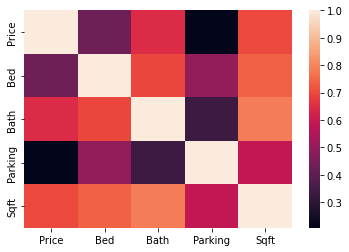

In [75]:

corr = property_df.corr()

corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(property_df.corr())

### Correlogram

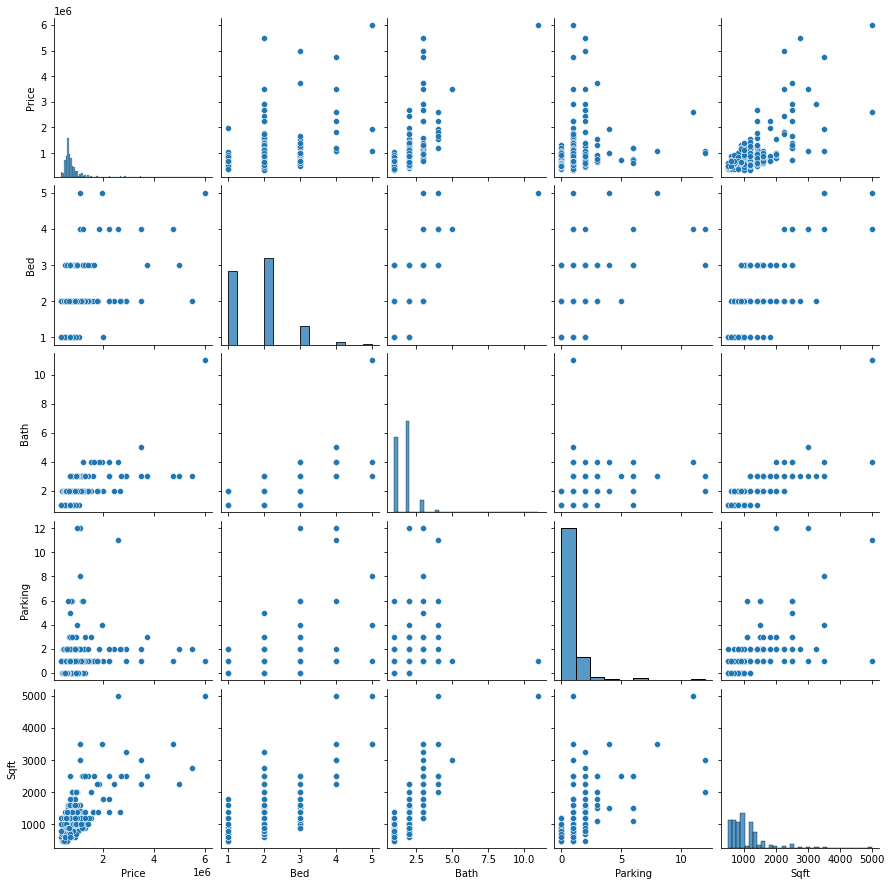

In [76]:
sns.pairplot(property_df.drop(columns='Address'))

### From the below histogram we can see that all the columns are left skewed.

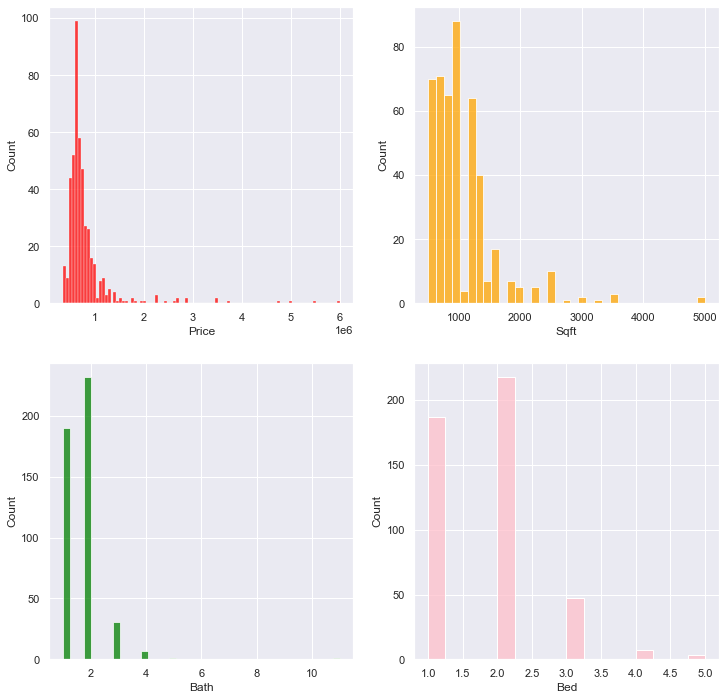

In [77]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(data=property_df, x="Price",  color="red", ax=axs[0, 0])
sns.histplot(data=property_df, x="Sqft",  color="orange", ax=axs[0, 1])
sns.histplot(data=property_df, x="Bath",  color="green", ax=axs[1, 0])
sns.histplot(data=property_df, x="Bed",  color="pink", ax=axs[1, 1])
plt.show()

#### The below box plots shows the presence of outliers for each columns

Price         AxesSubplot(0.125,0.657941;0.227941x0.222059)
Bed        AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Bath       AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Parking       AxesSubplot(0.125,0.391471;0.227941x0.222059)
Sqft       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

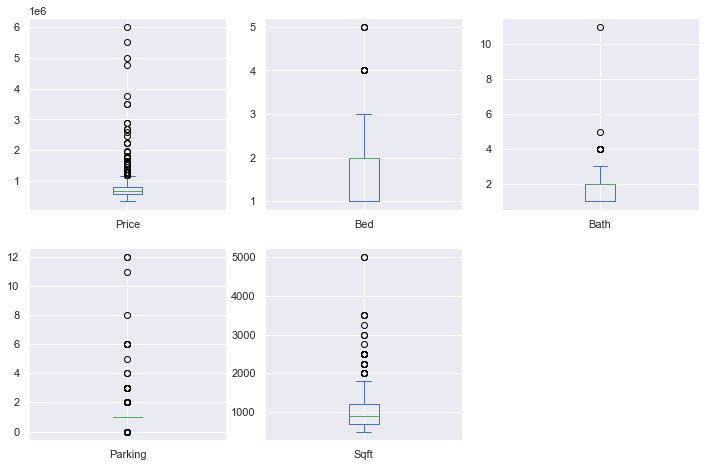

In [78]:
property_df.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True)

### Scatter Plots between Price and Sqft

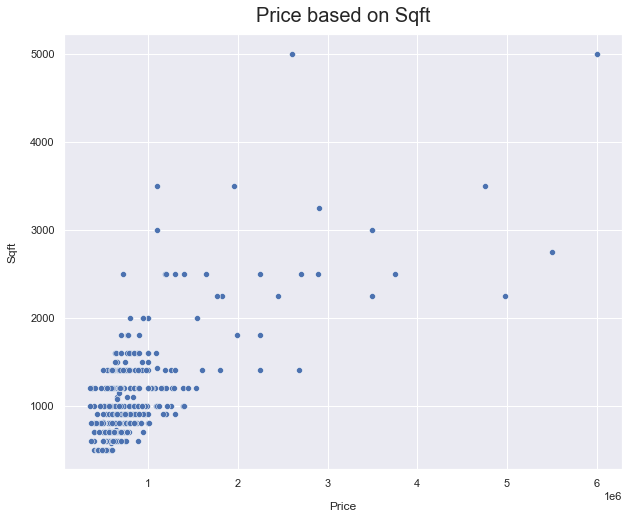

In [79]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Price', y='Sqft', data=property_df)
plt.title("Price based on Sqft", y=1.015, fontsize=20)
plt.xlabel("Price", labelpad=13)
plt.ylabel("Sqft", labelpad=13)
ax = plt.gca()

In [80]:
property_df.describe()

,Price,Bed,Bath,Parking,Sqft
count,4.620000e+02,462.000000,462.000000,462.000000,462.000000
mean,8.204696e+05,1.746753,1.712121,1.166667,1062.549784
std,5.939193e+05,0.750083,0.807653,1.235911,559.037239
min,3.500000e+05,1.000000,1.000000,0.000000,499.000000
25%,5.899000e+05,1.000000,1.000000,1.000000,699.000000
50%,6.765000e+05,2.000000,2.000000,1.000000,899.000000
75%,8.260000e+05,2.000000,2.000000,1.000000,1199.000000
max,6.000000e+06,5.000000,11.000000,12.000000,5000.000000


# Outlier Removal

# Quantile-based Flooring and Capping -- Price column

In [81]:
print(property_df['Price'].quantile(0.10))

499909.0


In [82]:
print(property_df['Price'].quantile(0.90))

1147500.000000001


In [83]:
property_df['Price_FlCap']=np.where(property_df['Price'] < 520000 ,520000,property_df['Price'])

In [84]:
property_df['Price_FlCap']=np.where(property_df['Price'] > 1249000 ,1249000,property_df['Price'])

In [85]:
property_df.head(4)

,Price,Address,Bed,Bath,Parking,Sqft,Price_FlCap
0,769000,2020 Maple Blvd,3,1,6,1100,769000
2,835000,35 Cheltonwood Ave,3,2,3,1100,835000
3,649900,276 Herbert St,3,1,3,1100,649900
4,739900,21 Trafalger St,3,2,6,1500,739900


## Trimming- Bed, bath and parking

Bed

In [86]:
max(property_df['Bed'])

5

In [87]:
min(property_df['Bed'])

1

In [88]:
property_df[property_df['Bed']>=5]

,Price,Address,Bed,Bath,Parking,Sqft,Price_FlCap
8,1099000,5442 Tenth Line,5,3,8,3500,1099000
35,1958000,Lot 164 Fuller Dr,5,4,4,3500,1249000
265,6000000,UPH - 1 Cordoba Dr,5,11,1,5000,1249000


### From the above results, Bed >=5 seems to be an outlier , since it has bath =11 and sqft =10000 so trimming the same

In [89]:
bed_index=property_df[property_df['Bed']>=5].index

In [90]:
bed_index

Int64Index([8, 35, 265], dtype='int64')

In [91]:
property_df=property_df.drop(index=bed_index)

In [92]:
property_df.shape

(459, 7)

In [93]:
property_df.head(3)

,Price,Address,Bed,Bath,Parking,Sqft,Price_FlCap
0,769000,2020 Maple Blvd,3,1,6,1100,769000
2,835000,35 Cheltonwood Ave,3,2,3,1100,835000
3,649900,276 Herbert St,3,1,3,1100,649900


# Log Transformation

In [94]:
property_df['log_Price']=property_df['Price'].map(lambda x: np.log(x) if x > 0 else 0)

In [95]:
property_df['Price']

0      769000
2      835000
3      649900
4      739900
5      649900
        ...  
473    369900
474    549000
475    659900
476    895000
477    699000
Name: Price, Length: 459, dtype: int32

In [96]:
print(property_df['Price'].skew())

4.945366764996939


In [97]:
print(property_df['log_Price'].skew())

2.0016108778623134


In [98]:
property_df['log_Sqft']=property_df['Sqft'].map(lambda x: np.log(x) if x > 0 else 0)

In [99]:
print(property_df['Sqft'].skew())

2.5367391940533723


In [100]:
print(property_df['log_Sqft'].skew())

0.7416514245635433


### Box Plots after outlier treatments

#### min(property_df['Price']) is 1 which is a genuine case

C:\Users\devel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


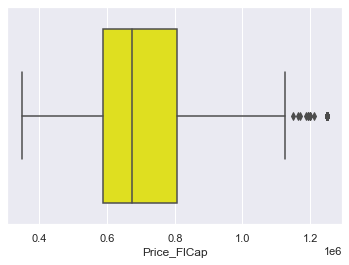

In [101]:
sns.boxplot( property_df['Price_FlCap'],color='yellow' )
plt.show()


C:\Users\devel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


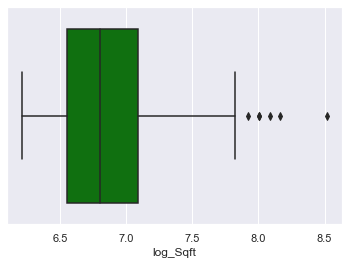

In [102]:
sns.boxplot( property_df['log_Sqft'] ,color='green')
plt.show()

#### From the below boxplot it is evident that the log transformation of Price column doesnt help in removing the outliers

C:\Users\devel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


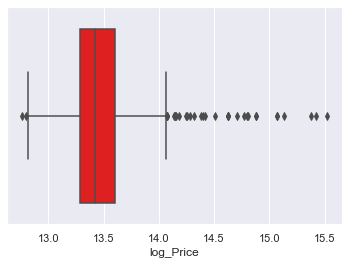

In [103]:
sns.boxplot( property_df['log_Price'],color='red')
plt.show()

C:\Users\devel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


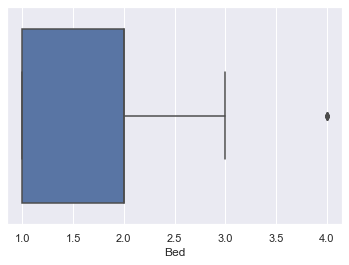

In [104]:
sns.boxplot( property_df['Bed'])
plt.show()

### Thus the Price_FlCap and log_Sqft has a correct distribution when compared to other outlier treatment methods.

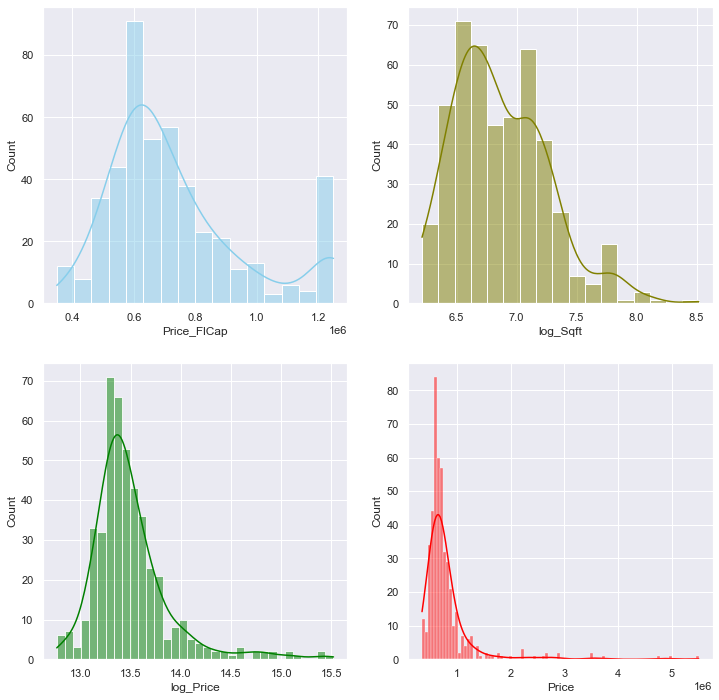

In [105]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(data=property_df, x="Price_FlCap", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=property_df, x="log_Sqft", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=property_df, x="log_Price", kde=True, color="green", ax=axs[1, 0])
sns.histplot(data=property_df, x="Price", kde=True, color="red", ax=axs[1, 1])
plt.show()

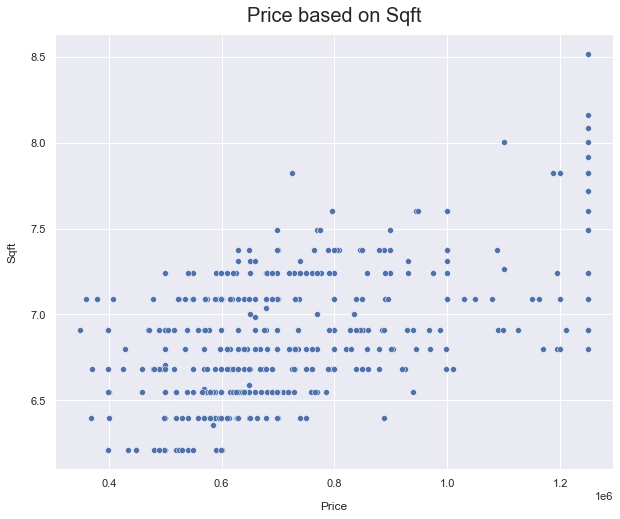

In [106]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Price_FlCap', y='log_Sqft', data=property_df)
plt.title("Price based on Sqft", y=1.015, fontsize=20)
plt.xlabel("Price", labelpad=13)
plt.ylabel("Sqft", labelpad=13)
ax = plt.gca()

## Since Proce and Sqft seems to be the best parameters from teh above analysis, we are going ahead with the 2 dimensional clustering process.

# Scaling of the numerical data

In [107]:
minmax_num_data=property_df[['Price_FlCap','log_Sqft']]

In [108]:
min_max_scaler = preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(minmax_num_data)

In [109]:
scaled_data

array([[0.46607341, 0.34299392],
       [0.53948832, 0.34299392],
       [0.33359288, 0.34299392],
       [0.43370412, 0.47757548],
       [0.33359288, 0.47757548],
       [0.34471635, 0.47757548],
       [0.83425918, 0.77834397],
       [0.72191324, 0.47757548],
       [0.49499444, 0.60240568],
       [0.93214683, 0.69923151],
       [1.        , 0.77834397],
       [1.        , 0.60240568],
       [0.42814238, 0.25543705],
       [0.24471635, 0.07925737],
       [0.4538376 , 0.14624947],
       [0.22246941, 0.44732824],
       [0.19466073, 0.38038791],
       [0.33359288, 0.44732824],
       [0.51034483, 0.50530857],
       [0.31034483, 0.38038791],
       [0.49944383, 0.25543705],
       [0.93993326, 0.44732824],
       [0.36585095, 0.07925737],
       [0.27697442, 0.14624947],
       [0.41713014, 0.69923151],
       [0.31034483, 0.47757548],
       [0.94538376, 0.69923151],
       [0.64505006, 0.47757548],
       [1.        , 0.69923151],
       [0.30589544, 0.07925737],
       [0.

# KMeans Clustering Algorithm

In [110]:
kmeans=cluster.KMeans(n_clusters=3,init="k-means++")
kmeans=kmeans.fit(scaled_data)

In [111]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2,
       1, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 2, 0, 1, 1, 2, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2,
       1, 1, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0, 2,
       1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1,

In [112]:
inertia = []
for n in range(1 , 11):
    algorithm = (cluster.KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  ) )
    algorithm.fit(scaled_data)
    inertia.append(algorithm.inertia_)

C:\Users\devel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


# Finding the best K Values.

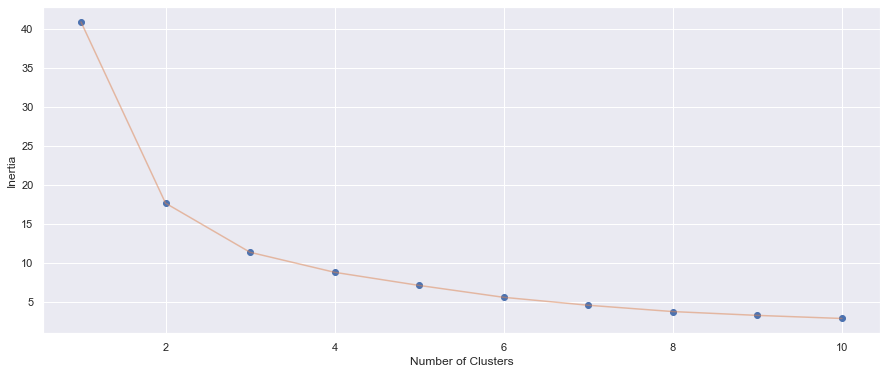

In [113]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.style.use("seaborn")
plt.show()

### The best value of K is taken as 3 from the above graph

In [114]:
kmeans=cluster.KMeans(n_clusters=3,init="k-means++")
kmeans=kmeans.fit(scaled_data)

In [115]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2,
       1, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 2, 0, 1, 1, 2, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2,
       1, 1, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0, 2,
       1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1,

In [116]:
cluster_df = pd.DataFrame({'Price':property_df['Price_FlCap'],'Sqft': property_df['log_Sqft'],
     'Cluster': kmeans.labels_
    })

In [117]:
cluster_df[cluster_df['Cluster']==1].shape

(225, 3)

In [118]:
cluster_df[cluster_df['Cluster']==0].shape

(170, 3)

In [119]:
cluster_df[cluster_df['Cluster']==2].shape

(64, 3)

In [120]:
cluster_df.head(3)

,Price,Sqft,Cluster
0,769000,7.003065,0
2,835000,7.003065,0
3,649900,7.003065,0


In [121]:
data=cluster_df[['Price','Sqft']]

In [122]:
kmeans.cluster_centers_

array([[0.46003061, 0.35100899],
       [0.25347005, 0.16640283],
       [0.91785082, 0.50917819]])

In [123]:
n_clusters = kmeans.cluster_centers_
n_clusters

array([[0.46003061, 0.35100899],
       [0.25347005, 0.16640283],
       [0.91785082, 0.50917819]])

In [124]:
data1 = cluster_df[cluster_df.Cluster==0]
data2 = cluster_df[cluster_df.Cluster==1]
data3 = cluster_df[cluster_df.Cluster==2]


# Plotting the obtained 3 clusters using scatter plot

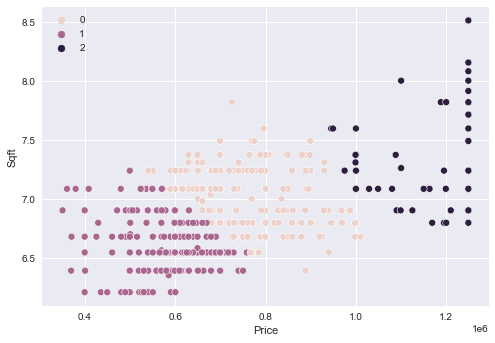

In [125]:
sns.scatterplot(data=cluster_df, x="Price", y="Sqft", hue=kmeans.labels_)
plt.show()

# Mean shift Clustering

In [126]:
meansh=MeanShift(bandwidth=None, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=None, max_iter=300)

In [127]:
plt_clusters=cluster_df

In [128]:
meansh.fit(scaled_data)

MeanShift()

In [129]:
labels = meansh.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

In [130]:
print('Estimated number of clusters: ' + str(n_clusters_))

Estimated number of clusters: 3


# Plotting the obtained 3 clusters using scatter plot

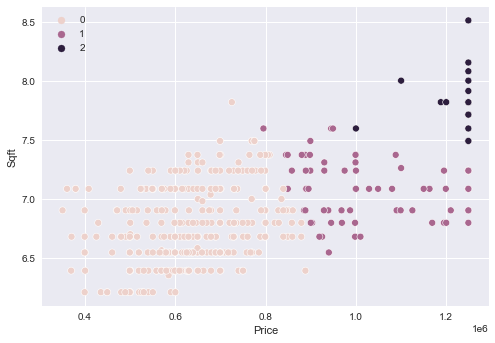

In [131]:
sns.scatterplot(data=cluster_df, x="Price", y="Sqft", hue=labels)
plt.show()

In [132]:
import pandas_profiling as pp
profile = pp.ProfileReport(df_prop)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]